<a href="https://colab.research.google.com/github/MazRadwan/Machine_Learning/blob/main/kmeans_clustering_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

In this workshop we will learn about the K-Means clustering machine learning algorithm. This algorithm has various applications such as:

- Market segmentation
- Social network analysis
- Astronomical data analysis
- Organizing computer clusters
- Image compression
- Grouping of artistic works

This algorithm is more straightforward than most, and despite it's simplicity it is popular and widely used. Before we get into the details of the algorithm though, there are a few properties of the algorithm that we need to understand.

In this notebook we will go through the basics of the K-Means algorithm and then proceed to a practical application: customer segmentation.

## Supervised vs Unsupervised Machine Learning

Most machine learning algorithms can be grouped into one of two categories: _supervised_ or _unsupervised_:

- Supervised algorithms use labels while they're training to learn the expected results from various samples.
  - An example of this is predicting the price of cars. We show the algorithm car prices that we know of, then it can learn from those and use them to predict previously unseen car prices.
  - The name 'supervised' comes from the idea that we are supervising our algorithm as it learns by showing it the correct labels for each sample.
- In contrast, unsupervised algorithms learn only from the structure of the data itself and do not use labels.
  - An important difference to remember for this type of algorithm is that the **meaning of the output is unknown**.
    - In supervised learning it is very clear that the output of the algorithm carries the same meaning as the labels we used, whereas in unsupervised learning the output is just a representation of whatever structure the algorithm learned.
    - This means that after an unsupervised algorithm is done, it is up to the humans to decide what the output means in their context.
  - The name 'unsupervised' comes from the idea that we are only giving the algorithm the data, then letting it figure out on it's own what the structure of the data is without supervision.

For supervised learning, you can think of it as the algorithm studying for a test using flashcards, where each sample is a flash card, with questions (inputs) on the front of the card and the answer (the label) on the back.

For unsupervised learning, it's as though the flashcards only have a front and don't have an answer on the back, and the goal of the computer in this test is to organize the questions and determine their similarities and differences.

**The K-Means algorithm is an unsupervised machine learning algorithm**.


## Clustering

In addition to being unsupervised, the **K-Means algorithm is also a clustering algorithm**. Clustering algorithms are another category of machine learning algorithms (which are typically unsupervised) which find groups of similar data within a dataset, and they allow us to categorize new, previously unseen data into the learned groups. K-Means splits the data into $k$ categories, which is where it gets it's name from.

## The K-Means Algorithm

To use K-Means, you must first decide on the value for $k$, the number of **clusters** which the algorithm should group our data into.

After $k$ has been decided, the algorithm works as follows:

1. Initialize $k$ points known as cluster **centroids**.
  - These points will be moved throughout the algorithm towards the centers of the data clusters
2. For each data point, assign that point to the centroid which is closest to it.
3. Move each centroid to the center of all points assigned to it.
4. Repeat steps 2 and 3 until the centroids stop moving.

After the algorithm is finished, we will have $k$ groups of data which are the collections of points assigned to each of our $k$ centroids. When a new data point is introduced which we want to categorize, we can simply find the centroid which is closest to it and assign it to that group.

## K-Means in Action

Let's use K-Means on some example data to get a better understanding of how it works. We'll start by generating some data using SKLearn's `make_blobs` function. This function creates data which is neatly organized into groups.

In [35]:
if 'sklearn_installed' not in globals().keys():
  # Make sure a suitable version of sklearn is installed
  !pip install scikit-learn==1.2.2 # Substitute with your preferred version


sklearn_installed = True

In [37]:
from sklearn.datasets import make_blobs

n_clusters = 3

# create example dataset with data clustered into n_clusters
# NOTE: make_blobs gives us labels for each group, however we won't be using these
# labels as we will be learning our own groups
X_practice, y = make_blobs(
   n_samples=150, n_features=2,
   centers=n_clusters,
   # Try increasing and decreasing this number and see how the clusters and
   # algorithm are affected
   cluster_std=0.5,
   shuffle=False, random_state=0
)

It's not very clear from the just looking at the numbers how this data is grouped, so let's visualize it in a scatter plot.

In [40]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure

output_notebook()

data_plot = figure()

# Grab our two feature columns and plot them so we can see the clustered pattern
# of the data
x1 = X_practice[:, 0]
x2 = X_practice[:, 1]
data_plot.circle(x=x1, y=x2)

show(data_plot)

Now it's very clear that our dataset is split into 3 groups, so let's use K-Means to identify these groups. Following step 1 of the algorithm, we will initialize 3 centroids:

In [41]:
import numpy as np

# Create initial locations for centroids
init = np.array([[10, 2],
                 [-10, 3],
                 [1, -3]])
# A possible solution for initializing any number of clusters
# init = np.random.randint(low=-20, high=21, size=(n_clusters, 2)))

# Add the centroid coordinates to the plot
data_plot.scatter(init[:, 0], init[:, 1], marker='x', size=20, color='red')

show(data_plot)

Now that we have our initial locations for our centroids, lets watch as K-Means moves the centroids towards the centers of our clusters, gradually assigning the data points in each cluster to the corresponding centroid.

In [14]:
#@title K-Means Steps on Above Data { display-mode: "form" }

from sklearn.cluster import KMeans
from ipywidgets import Button
from IPython.display import display

pred_plot = figure()

# An array holding the each centroid's renderers
centroids = []

# Colours and shapes to distinguish the centroids and their clusters
# NOTE: This will need to be updated to plot more than 3 clusters
colors = ('green', 'purple', 'blue')
shapes = ('triangle', 'square', 'circle')

for i in range(n_clusters):
  centroid_label = 'Centroid ' + str(i + 1)

  initial_x = [init[i, 0]]
  initial_y = [init[i, 1]]

  # Add X markers for the centroid locations
  centers = pred_plot.scatter(initial_x, initial_y, marker='x',
                      color=colors[i], size=20, width=3,
                      legend_label=centroid_label)

  # Add lines for the centroid movement
  line = pred_plot.line(x=initial_x, y=initial_y, color=colors[i])

  # Add a scatter for the centroid's cluster
  cluster = pred_plot.scatter([], [], color=colors[i], marker=shapes[i],
                             legend_label=centroid_label + ' cluster')

  centroids.append((centers, line, cluster))

def get_cluster(pred, label):
  """Get the `X` values corresponding to a given centroid's cluster.

  :param: pred The predicted labels for each sample
  :param: label The label for the desired cluster
  :return: A tuple of length 2 whose first item contains the x coordinates of
    the values and whose second item contains the y.
  """
  indices = pred == label
  return X_practice[indices, 0], X_practice[indices, 1]

# Plot out the initial data points
initial_data = pred_plot.circle(x=x1, y=x2)

pred_plot.legend.location = 'bottom_left'

# Show the plot and retrieve the notebook handle for the plot so we can update
# it later
handle = show(pred_plot, notebook_handle=True)

# Remove the initial data as it will be replaced with the clusters the next time
# the plot is updated
initial_data.data_source.data.update({'x': [], 'y': []})

# The total number of iterations for the current run of k-means
max_iter = 1

# The button widget takes care of telling the notebook to redraw the plot
button = Button(description='Next')

def on_button_click(_):
  # Allows us to access and update max_iter from within the function
  global max_iter

  # Run k-means with the current number of iterations
  km = KMeans(
      n_clusters=n_clusters,
      max_iter=max_iter,
      # These last three parameter ensure we get the same results each time for
      # demonstration purposes
      # Initialize with set locations
      init=init,
      # Only initialize once
      n_init=1,
      # Use the same random state each time
      random_state=0
  )

  # Fit the model to our data and get a prediction of the labels for each sample
  pred = km.fit_predict(X_practice)

  for i, (centers, line, cluster) in enumerate(centroids):
    centers_ds = centers.data_source
    # Add the new centroid location to our existing locations and update the
    # data sources
    new_x = [*centers_ds.data['x'], km.cluster_centers_[i, 0]]
    new_y = [*centers_ds.data['y'], km.cluster_centers_[i, 1]]
    new_data = {'x': new_x, 'y': new_y}
    centers_ds.data.update(new_data)
    line.data_source.data.update(new_data)

    # Replace the old clusters with the new using our updated predictions
    c = get_cluster(pred, i)
    cluster.data_source.data.update({'x': c[0], 'y': c[1]})

  # Update our plot in the notebook
  push_notebook(handle=handle)
  # Prepare for the next button press
  max_iter += 1

# Listen for clicks on the button and display it
button.on_click(on_button_click)
display(button)

Button(description='Next', style=ButtonStyle())

>  Click the "Next" button to cycle through the steps the algorithm is taking. Make sure you run all cells before clicking the button, and re-run the above cell to restart the algorithm. Double click on the above cell to see the code that creates this animation.



# Project: Customer Segmentation

Now that we understand the basics of K-means, let's move on to a practical application of the algorithm. We will be performing customer segmentation using the customer data in [Mall_Customers.csv](https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view) (you will need to download the zip file and access the CSV within).

[Customer/Market Segmentation](https://en.wikipedia.org/wiki/Market_segmentation) is "*the activity of dividing a broad consumer or business market... into sub-groups of consumers (known as segments) based on some type of shared characteristics*". In our case we will have a consumer market of mall customers and we will be attempting to divide this market based on shared characteristics such as age and income.

We will assume the role of data scientists hired by a mall to interpret it's customer data and derive some new value from it, specifically distinct, targetable groups of customers.

## Understanding Our Data

Let's use interactive dataframes in our notebook.

In [42]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


The data came with some column names which are not great for use in Python, so let's rename them. It also includes an `id` column which can be used as an index and is not very useful otherwise, so we'll use it as such.

In [43]:
import pandas as pd
customers = pd.read_csv('Mall_Customers.csv', header=0,
                        names=['id', 'gender', 'age', 'annual_income', 'spending_score'],
                        index_col='id')
customers

,gender,age,annual_income,spending_score
id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


A few notes:

- The `annual_income` column is in the thousands of dollars, so a value of 28 represents an annual income of $28,000.
- The `spending_score` values are representations of the amount any given customer spends. They range from 1 to 100, with 1 being the least spending and 100 being the most.
- There is no garbage data in our dataset as indicated by `info`.

Let's see the mean, minimum, and maximum for our numeric columns.

In [45]:
customers.drop(labels='gender', axis=1).agg(['mean', 'min', 'max'])

,age,annual_income,spending_score
mean,38.85,60.56,50.2
min,18.00,15.00,1.0
max,70.00,137.00,99.0


And for our categorical `gender` column lets see it's categories.

In [50]:
customers['gender'].unique()

array(['Male', 'Female'], dtype=object)

Now let's get the mean by gender for our numeric columns and visualize it.

<Axes: xlabel='gender'>

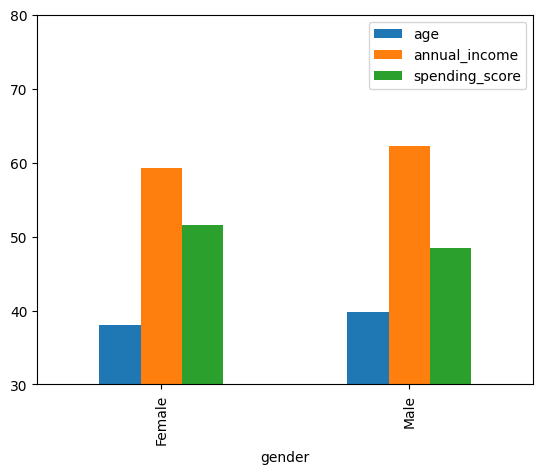

In [51]:
customers.groupby('gender').mean().plot.bar(ylim=(30, 80))

Let's see the ratio of males to females in our data.

gender
Female    112
Male       88
Name: count, dtype: int64


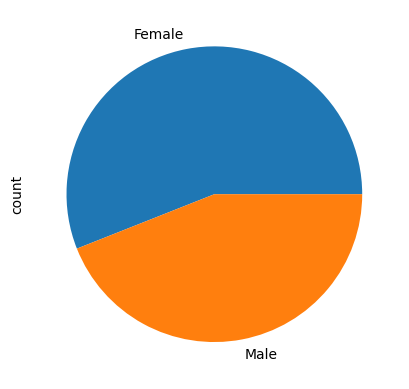

In [52]:
counts = customers['gender'].value_counts()
counts.plot.pie()
print(counts)

Let's visualize our age group and income frequencies with histograms.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

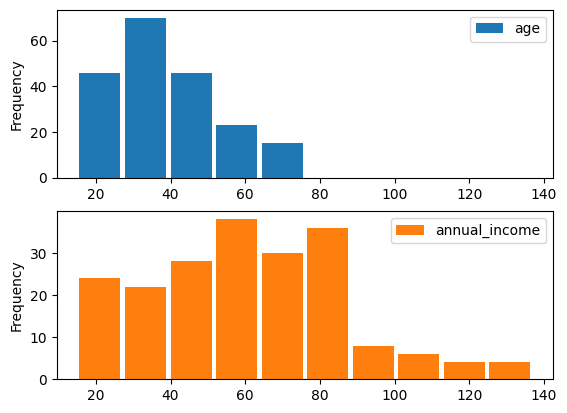

In [49]:
customers[['age', 'annual_income']].plot.hist(subplots=True, rwidth=0.9, sharex=False)

**Challenge**: Summarize, in text, what our graphs have shown us about our dataset.

## Training

### Basic KMeans Example with SKLearn

The minimum steps required to run KMeans on our data are:

1. Gather numeric data to cluster (KMeans isn't designed for categorical data)
2. Create a `KMeans` object
3. Call `fit` on the `KMeans` object with our numeric data as an argument

In [23]:
from sklearn.cluster import KMeans

num_cols = ['age', 'annual_income', 'spending_score']
X = customers[num_cols]
kmeans = KMeans()
kmeans.fit(X) # calling fit makes it go throught he algorithm -- training your model




KMeans()

In [24]:
from sklearn.cluster import KMeans

num_cols = ['age', 'annual_income', 'spending_score']
X = customers[num_cols]
kmeans = KMeans()
kmeans.fit(X)

KMeans()

In [54]:
kmeans.predict(X[:5]) # predict on the first 5 customers

array([8, 4, 8, 4, 8], dtype=int32)

Our `KMeans` object is now fitted to our data, which means the centroids are in their final locations, and we can group data into clusters.

In [25]:
# View the cluster centers (by default KMeans uses 8 clusters)
# Note that the cluster coordinates are 3-dimensional just like our data
print(kmeans.cluster_centers_)

[[ 27.          56.65789474  49.13157895]
 [ 32.2        109.7         82.        ]
 [ 41.96        79.64        15.4       ]
 [ 56.15555556  53.37777778  49.08888889]
 [ 25.27272727  25.72727273  79.36363636]
 [ 44.14285714  25.14285714  19.52380952]
 [ 32.86206897  78.55172414  82.17241379]
 [ 41.         109.7         22.        ]]


In [26]:
# Print out the group number for each customer in our dataset
print(kmeans.predict(X))

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 3 4 3 0 5 4 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 6 0 6 2 6 2 6 2 6 0 6 2 6 2 6 2 6 2 6 0 6 2 6 2 6
 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 7 1 7 1 7
 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1]


#### Evaluating Performance with Inertia

We can also evaluate the performance of our model. One of the easiest ways to do this is by looking at the *inertia* of our model which is stored in the `inertia_` property.

In simple terms, the inertia can be thought of as the total distance between each sample in our dataset and the center of the group it was assigned to. Intuitively, we want our clusters to be well separated and distinct so that we know our groups are meaningful. With this in mind, we want our model's inertia to be as small as possible so that each sample is closer to the center of it's group (and farther from the other groups).

Let's look at our current model's inertia.

In [27]:
kmeans.inertia_

44310.50582506425

The inertia of our model is currently very high. This means that if we were to plot out some of our data, we would likely see each of the cluster's samples intermingled amongst the other samples, with no clear groupings. With this model we have not clearly segmented our customers at all, but let's look at some ways we can improve the model.

### Preprocessing

When using KMeans, it is crucial to perform data scaling (ensure all of our data falls within the same range). In our dataset, each of the numeric columns are on different scales: age ranges from 18 to 70, income ranges from 15 to 137, and spending score ranges from 1 to 99.

We need to scale our data because KMeans works by calculating the distances between each data point and the centroids, so if the coordinates of each data point are each on different scales it will confuse the algorithm's distance calculations.

The lack of scaling in our first model is likely a potential area of improvement. In Sci-Kit Learn we can use `StandardScaler` to scale our data. We can then use a *column transformer* to scale each of our columns, and we can put our scaling and model all together into one continuous process with a *pipeline*.

Let's start by importing the necessary objects and telling sklearn to use diagram displays.

In [28]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

sklearn.set_config(display='diagram')

Now lets create our scaler and try it out on a few samples. Note how the relative size of each item within its column is preserved, but how all values now fall within the same range.

In [29]:
print(X[:5])
scaler = StandardScaler()
print(scaler.fit_transform(X[:5]))

    age  annual_income  spending_score
id                                    
1    19             15              39
2    21             15              81
3    20             16               6
4    23             16              77
5    31             17              40
[[-0.88205286 -1.06904497 -0.34653653]
 [-0.41781451 -1.06904497  1.16956078]
 [-0.64993368  0.26726124 -1.53775583]
 [ 0.04642383  0.26726124  1.02517056]
 [ 1.90337722  1.60356745 -0.31043897]]


Now let's create our column transformer which can apply transformations to specific columns in our dataset. We do this with `make_column_transformer` which takes any number of tuples as arguments. Each tuple contains the transformer to apply to the columns and the identifiers of the columns to transform. In our case we want to apply scaling to each of our numeric columns, so we pass a tuple with our scaler and a list of the names of those columns.

Note that we can now pass our entire dataframe and our column transformer will transform the specified columns and drop the rest.

In [30]:
preprocesser = make_column_transformer((scaler, num_cols))
print(preprocesser.fit_transform(customers)[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


Now to put KMeans and it's preprocessing requirements all in one object we can use a pipeline.

Because we specified `display='diagram'` earlier, sklearn will display our pipeline as a neat diagram. Try clicking on the different parts of the diagram to see more details.

In [31]:
# We set the random state here to make sure the results are reproducible; this is
# a common practice in research but in an application you wouldn't want to do this
kmeans = make_pipeline(preprocesser, KMeans(random_state=0))
kmeans

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'spending_score'])])),
                ('kmeans', KMeans(random_state=0))])

With this pipeline we can now pass our dataframe into `fit` and the data will be scaled then passed to KMeans to be clustered.

In [32]:
kmeans.fit(customers)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'spending_score'])])),
                ('kmeans', KMeans(random_state=0))])

We can now check the inertia of our model by accessing the `kmeans` step in our pipeline.

In [33]:
kmeans.named_steps['kmeans'].inertia_

112.92246508652957

Now we have significantly decreased our model's inertia just by scaling our data before fitting.

**Challenge**: Read over the [user guide section for the column transformer](https://scikit-learn.org/stable/modules/compose.html#columntransformer-for-heterogeneous-data) and ask questions about anything that doesn't make sense.

### Choosing $k$

Another important step in using KMeans is to choose the value of $k$. Our model currently uses the default $k$ in sklearn which is 8, but it is very unlikely that this will be the ideal number of clusters for our problem.

The number of clusters to use is dependent on the problem. Sometimes we have an idea about how many clusters we want, for example if we were trying to cluster customers into groups using their body dimensions in order to generate three different sizes for clothing. In that case we would set $k = 3$.

However in other cases we know only that we want to cluster our data, but we don't know how many clusters is best. This is the case for us: we know that we want to find different segments of our customers, but we can't tell how many segments there are in our customer-base.

Ultimately the number of clusters comes down to what you think is best for your problem, but when we don't know how many clusters we want there are a few different methods to help us choose.

#### The Elbow Method

One way that we can choose $k$ is by looking at the inertia of our model with different values of $k$. You'll remember from earlier that we want a small inertia, however we cannot simply find the smallest inertia because the inertia of KMeans will always decrease as $k$ increases. This is because as we increase $k$ the size of each cluster will decrease as we split our data into more groups, and so the total distance between each data point and it's centroid will naturally decrease.

So in order to use the inertia of our model we can use the *elbow method*. In this method we run the model at different values of $k$ and plot the inertia against each value. We then look for an 'elbow' in the plot, or a point where the difference between the points decreases significantly. The idea is that the point where the inertia stops falling rapidly will be a good number of clusters for the data.

In [34]:
inertias = []
# We'll test k from 1 through 10
k_vals = range(1, 10)

# Get the inertia of our model at each k value
for k in k_vals:
  # We can change the parameters of steps within our pipeline using the name of
  # the step (kmeans) followed by two underscores and the parameter name
  kmeans.set_params(kmeans__n_clusters=k)
  kmeans.fit(customers)
  inertias.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the inertias at each value of k
elbow = figure(title='Customer KMeans Elbow Method', x_axis_label='k', y_axis_label='Inertia')
elbow.circle(k_vals, inertias)
elbow.line(k_vals, inertias)
show(elbow)

SerializationError: can't serialize <class 'range'>

From the plot we see a few things:

- With just one cluster our inertia is very high, which is to be expected
- As we increase the number of clusters, the inertia always decreases
- There is a significant decrease in the change of inertia right at $k=4$, so we can say that 4 might be a good number of clusters for our problem
- There isn't a clear 'elbow' in our plot, it looks closer to an outstretched arm so it's hard to be decisive about the value of $k$. This is often the case when using KMeans, and for that reason other methods have been developed to help us narrow down $k$ even more

Let's look now at our model's score after scaling our data and determining a suitable $k$ for our dataset.

In [ ]:
optimal_k = 4
kmeans.set_params(kmeans__n_clusters=optimal_k)
kmeans.fit(customers)
print('Inertia:\t\t', kmeans.named_steps['kmeans'].inertia_)

You'll notice that we have actually increased our model's inertia from before when we were only scaling our data, however this is to be expected as before we were using $k=8$ (the default in sklearn). Furthermore, this increase is acceptable as we have increased our silhouette score from the score at $k=8$.

It's important to remember that these scores are only heuristics (it cannot be proven that the best score gaurantees the best model) which is often the case with unsupervised learning. The scores are only a method of getting to the best solution quicker, and the most important performance evaluation for KMeans and clustering in general is how well it is solving your problem.

In our case we would evaluate our model by deciding if the customer segments it generates are really discernable groups with different needs that we can meet. This decision would likely be based off of whether or not the profit of our company was sufficiently increased following the deployment of our model.

Now that our model is trained on our data, let's analyze the results. We'll try visualizing the segments which our model has determined by plotting the customers' spending scores and annual incomes.

In [ ]:
# Create a new column containing each customer's assigned segment
customers['category'] = kmeans.fit_predict(customers)
# Get the segments labels and sort them for easier visual processing in the plot
segments = customers['category'].unique()
segments.sort()

segments_fig = figure(title='Customer Segments | Annual Income and Spending Score',
                    x_axis_label='Annual Income', y_axis_label='Spending Score')
palette = Colorblind[len(segments)]

# Gather x and y data
income = customers['annual_income']
spend = customers['spending_score']

for i, segment in enumerate(segments):
  # Get the positions of the customers in this segment
  indices = customers['category'] == segment
  segments_fig.scatter(income[indices], spend[indices], color=palette[i], legend_label=('Segment ' + str(segment)))

show(segments_fig)

From our plot we can see that our model has segmented our customers fairly well by income and spending. The lack of separation between categories 2 and 4 in the center is likely an area for improvement, however it is worth noting that this plot does not take into account age.

At this point our model is trained, however all we have are numbered clusters with no indication of meaning, so now it is up to us to interpret the results. In a real world customer segmentation scenario it would likely be something like a marketing team that would take the segments and try to identify each segment's characteristics, however us data scientists can also try our hand at it:

- **Segments 2 and 4**: these are the average customers; they don't overspend or underspend, and they make neither lots nor little money.
- **Segment 1**: these are the customers who, despite a low income, spend above average amounts of money. This could indicate a segment of impulse buyers.
- **Segment 3**: these are the customers who make and spend lots of money. This could indicate a segment of customers who are partial to luxury goods and have the means to buy them.
- **Segment 5**: these are the customers with low incomes and spending. A customer within this segment is likely to be a conservative buyer who will only go for the essentials.
- **Segment 0**: these are the customers who spend little despite a high income. These are likely conservative buyers, however they may be inclined to splurge occasionally as they have the means.

Now using our newly acquired segments our company can intelligently market to different types of customers and hopefully increase profits!

**Challenge**: Try plotting age against either annual income or spend score using the same clusters as before. Try to interpret the plot.

# Challenge

Try to determine how you would assign a new customer to one of the segments our model learned.

# Resources
- [SKLearn K-means Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Tutorial on K-means with SKLearn](https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c)
- [Another tutorial](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)
- [Andrew Ng Lecture Notes](https://www.coursera.org/learn/machine-learning/resources/kGWsY) (you may have to sign up for the course to view these)
- [Drawbacks of K-Means](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means)
- [K-Means customer segmentation in R](https://data-flair.training/blogs/r-data-science-project-customer-segmentation/)
  - [Data](https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view)